In [1]:
# calculate a face embedding for each face in the dataset using facenet
from numpy import load
from numpy import expand_dims
from numpy import asarray
from numpy import savez_compressed
from keras.models import load_model
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pip install --index-url https://google-coral.github.io/py-repo/ tflite_runtime

Looking in indexes: https://google-coral.github.io/py-repo/
     |████████████████████████████████| 1.5 MB 27.6 MB/s 


In [4]:
from tflite_runtime.interpreter import Interpreter 
from PIL import Image
import numpy as np
import time
import matplotlib.pyplot

In [5]:
# get the face embedding for one face
def get_embedding(model, face_pixels):
	# scale pixel values
	face_pixels = face_pixels.astype('float32')
	# standardize pixel values across channels (global)
	mean, std = face_pixels.mean(), face_pixels.std()
	face_pixels = (face_pixels - mean) / std
	# transform face into one sample
	samples = expand_dims(face_pixels, axis=0)
	# make prediction to get embedding
	yhat = model.predict(samples)
	return yhat[0]

In [7]:
# load the face dataset
data = load('/content/drive/MyDrive/data/image-recogination/faces-dataset10.npz',allow_pickle=True)
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)
# load the facenet model
model = load_model('/content/drive/MyDrive/Colab Notebooks/facenet_keras.h5')
print('Loaded Model')
# convert each face in the train set to an embedding
newTrainX = list()
for face_pixels in trainX:
	embedding = get_embedding(model, face_pixels)
	newTrainX.append(embedding)
newTrainX = asarray(newTrainX)
print(newTrainX.shape)
# convert each face in the test set to an embedding
newTestX = list()
for face_pixels in testX:
	embedding = get_embedding(model, face_pixels)
	newTestX.append(embedding)
newTestX = asarray(newTestX)
print(newTestX.shape)
# save arrays to one file in compressed format
savez_compressed('/content/drive/MyDrive/data/image-recogination/faces-embeddings8.npz', newTrainX, trainy, newTestX, testy)

Loaded:  (605, 160, 160, 3) (605,) (506, 160, 160, 3) (506,)
Loaded Model
(605, 128)
(506, 128)


In [ ]:
def set_input_tensor2(image):
  tensor_index = interpreter.get_input_details()[0]['index']
  # print("Index of the input tensor: ", tensor_index, end="\n\n")
  # Return the input tensor based on its index.
  input_tensor = interpreter.tensor(tensor_index)()[0]
  # Assigning the image to the input tensor.
  print(asarray(image).shape)
  input_tensor[:, :] = image

In [ ]:
def set_input_tensor(face_pixels):
  tensor_index = interpreter.get_input_details()[0]['index']
  # print("Index of the input tensor: ", tensor_index, end="\n\n")
  # Return the input tensor based on its index.
  input_tensor = interpreter.tensor(tensor_index)()[0]
  # Assigning the image to the input tensor.
  face_pixels = face_pixels.astype('float32')
  # standardize pixel values across channels (global)
  mean, std = face_pixels.mean(), face_pixels.std()
  face_pixels = (face_pixels - mean) / std
  # print(face_pixels.shape)
  samples = expand_dims(face_pixels, axis=0)
  # transform face into one sample
  # face_pixels = (face_pixels * 255).astype(np.uint8)
  image = Image.fromarray(face_pixels.astype(np.uint8))
  input_tensor[:, :] = image
  interpreter.invoke()
  output_details = interpreter.get_output_details()[0]
  # print("Details about the input tensors:\n   ", output_details, end="\n\n")
  scores = interpreter.get_tensor(output_details['index'])
  # print(scores[0].shape)
  return scores[0]

In [11]:
def set_input_tensor3(face_pixels):
  # scale pixel values
  face_pixels = asarray(face_pixels)
  face_pixels = face_pixels.astype(np.uint8)
	# standardize pixel values across channels (global)
  mean, std = face_pixels.mean(), face_pixels.std()
  face_pixels = (face_pixels - mean) / std
	# transform face into one sample
  samples = expand_dims(face_pixels, axis=0)
	# make prediction to get embedding
  tensor_index = interpreter.get_input_details()[0]['index']
  # print("Index of the input tensor: ", tensor_index, end="\n\n")
  # Return the input tensor based on its index.
  # print(samples.shape)
  input_tensor = interpreter.tensor(tensor_index)()[0]
  input_tensor[:, :] = samples

In [12]:
def classify_image():
  # Call the invoke() method from inside a function to avoid this RuntimeError: reference to internal data in the interpreter in the form of a numpy array or slice.
  interpreter.invoke()
  output_details = interpreter.get_output_details()[0]
  # print("Details about the input tensors:\n   ", output_details, end="\n\n")
  scores = interpreter.get_tensor(output_details['index'])
  # print(scores[0].shape)
  return scores[0]

In [ ]:
tensor_index = interpreter.get_input_details()[0]['index']
input_tensor_z= tf.convert_to_tensor(z, np.float32)
interpreter.set_tensor(tensor_index, input_tensor_z)

AttributeError: ignored

In [13]:
# load the face dataset
data = load('/content/drive/MyDrive/data/image-recogination/faces-dataset10.npz',allow_pickle=True)
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)
# load the facenet model
model_path ="/content/drive/MyDrive/data/image-recogination/facenet_model.tflite"
interpreter = Interpreter(model_path)
interpreter.allocate_tensors()
print("Model Loaded Successfully.")
# convert each face in the train set to an embedding
newTrainX = list()
for face_pixels in trainX:
		image = Image.fromarray(face_pixels.astype(np.uint8))
		set_input_tensor3(image)
		embedding = classify_image()
		newTrainX.append(embedding)
newTrainX = asarray(newTrainX)
print(newTrainX.shape)
# convert each face in the test set to an embedding
# model_path ="/content/drive/MyDrive/data/image-recogination/facenet_model.tflite"
# interpreter = Interpreter(model_path)
# interpreter.allocate_tensors()
# print("Model Loaded Successfully.")
newTestX = list()
for face_pixels in testX:
		image = Image.fromarray(face_pixels.astype(np.uint8))
		set_input_tensor3(image)
		embedding = classify_image()
		newTestX.append(embedding)
newTestX = asarray(newTestX)
print(newTestX.shape)
# save arrays to one file in compressed format
savez_compressed('/content/drive/MyDrive/data/image-recogination/faces-embeddings9.npz', newTrainX, trainy, newTestX, testy)

Loaded:  (605, 160, 160, 3) (605,) (506, 160, 160, 3) (506,)
Model Loaded Successfully.
(605, 128)
(506, 128)


In [ ]:
newTestX.shape

SyntaxError: ignored

In [ ]:
model = load_model('/content/drive/MyDrive/Colab Notebooks/facenet_keras.h5', compile=False)

In [ ]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpu4n9is7v/assets


In [ ]:
tflite_model_name = "facenet_model_tensorflowlite.tflite"
dir_loc = "/content/drive/MyDrive/data/image-recogination/"
open(dir_loc+tflite_model_name, "wb").write(tflite_model)

91221556

In [ ]:
import tensorflow.lite as lite
import tensorflow as tf

input_file = "/content/drive/MyDrive/Colab Notebooks/facenet_keras.h5"
output_file = "/content/drive/MyDrive/Colab Notebooks/facenet_keras_lite.tflite"

# Converts the Keras model to TensorFlow Lite
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/facenet_keras.h5')
converter = lite.TFLiteConverter.from_keras_model(model)
converter.post_training_quantize = True
tflite_model = converter.convert()
open(output_file, "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpgmoeo95l/assets


91221556

In [ ]:
pip install --index-url https://google-coral.github.io/py-repo/ tflite_runtime

Looking in indexes: https://google-coral.github.io/py-repo/
     |████████████████████████████████| 1.5 MB 34.1 MB/s 


In [ ]:
from tflite_runtime.interpreter import Interpreter 
from PIL import Image
import numpy as np
import time
import matplotlib.pyplot

In [ ]:
model_path ="/content/drive/MyDrive/data/image-recogination/facenet_model.tflite"

interpreter = Interpreter(model_path)
print("Model Loaded Successfully.")

Model Loaded Successfully.


In [ ]:
interpreter.allocate_tensors()

In [ ]:
print("Details about the input tensors:\n   ", interpreter.get_input_details())
print("There exist {num} input tensor(s).".format(num=len(interpreter.get_input_details())))
print("   Type:", type(interpreter.get_input_details()), end="\n\n")

print("Details about the first input tensor:\n  ", interpreter.get_input_details()[0])
print("   Type:", type(interpreter.get_input_details()[0]), end="\n\n")

print("Shape of the first input tensor:\n   ", interpreter.get_input_details()[0]['shape'])
print("   Type:", type(interpreter.get_input_details()[0]['shape']), end="\n\n")

_, height, width, _ = interpreter.get_input_details()[0]['shape']
print("Image Width = {width}\nImage Height = {height}".format(width=width, height=height))

Details about the input tensors:
    [{'name': 'input_2', 'index': 0, 'shape': array([  1, 160, 160,   3], dtype=int32), 'shape_signature': array([ -1, 160, 160,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
There exist 1 input tensor(s).
   Type: <class 'list'>

Details about the first input tensor:
   {'name': 'input_2', 'index': 0, 'shape': array([  1, 160, 160,   3], dtype=int32), 'shape_signature': array([ -1, 160, 160,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
   Type: <class 'dict'>

Shape of the first input tensor:
    [  1 160 160   3]
   Type: <class 'numpy.ndarray'>

Image Width = 160
Image Heig

In [ ]:
# Note: if no image present, upload your own test image as "test.jpg" to the mobilenet_v1 folder
image = Image.open("/content/drive/MyDrive/data/image-recogination/ananya/gray_faces/ananya-0.jpg_0_1725-0.jpeg").convert('RGB')
print("Original image size:", image.size)

image = image.resize((160, 160))
print("New size:", image.size)

Original image size: (373, 373)
New size: (160, 160)


In [ ]:
tensor_index = interpreter.get_input_details()[0]['index']
print("Index of the input tensor: ", tensor_index, end="\n\n")

Index of the input tensor:  0



In [ ]:
# Return the input tensor based on its index.
input_tensor = interpreter.tensor(tensor_index)()[0]
input_tensor[:, :] = image

In [ ]:
def set_input_tensor(interpreter, image):

  tensor_index = interpreter.get_input_details()[0]['index']
  print("Index of the input tensor: ", tensor_index, end="\n\n")

  # Return the input tensor based on its index.
  input_tensor = interpreter.tensor(tensor_index)()[0]

  matplotlib.pyplot.subplots(nrows=1, ncols=2)
  matplotlib.pyplot.subplot(121)
  matplotlib.pyplot.imshow(input_tensor)
  matplotlib.pyplot.title("Before")

  # Assigning the image to the input tensor.
  input_tensor[:, :] = image

  matplotlib.pyplot.subplot(122)
  matplotlib.pyplot.imshow(input_tensor)
  matplotlib.pyplot.title("After")
  matplotlib.pyplot.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index of the input tensor:  0



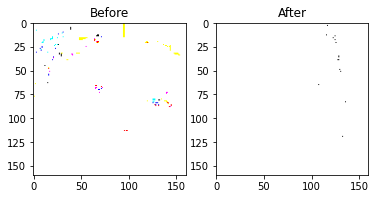

In [ ]:
set_input_tensor(interpreter, image)

In [ ]:
def classify_image(interpreter, image):

  # Call the invoke() method from inside a function to avoid this RuntimeError: reference to internal data in the interpreter in the form of a numpy array or slice.
  interpreter.invoke()

  output_details = interpreter.get_output_details()[0]
  print("Details about the input tensors:\n   ", output_details, end="\n\n")

  scores = interpreter.get_tensor(output_details['index'])[0]
  print("Predicted class label score      =", np.max(np.unique(scores)))

  # Dequantize the scores.
  scale, zero_point = output_details['quantization']
  scores_dequantized = scale * (scores - zero_point)

  dequantized_max_score = np.max(np.unique(scores_dequantized))
  print("Predicted class label probability=", dequantized_max_score, end="\n\n")

  max_score_index = np.where(scores_dequantized == np.max(np.unique(scores_dequantized)))[0][0]
  print("Predicted class label ID=", max_score_index)

  return max_score_index, dequantized_max_score

In [ ]:
label_id, prob = classify_image(interpreter, image)

Details about the input tensors:
    {'name': 'Identity', 'index': 456, 'shape': array([  1, 128], dtype=int32), 'shape_signature': array([ -1, 128], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}

Predicted class label score      = 2.6459787
Predicted class label probability= -0.0

Predicted class label ID= 0


In [ ]:
interpreter.invoke()

output_details = interpreter.get_output_details()[0]
print("Details about the input tensors:\n   ", output_details, end="\n\n")

Details about the input tensors:
    {'name': 'Identity', 'index': 456, 'shape': array([  1, 128], dtype=int32), 'shape_signature': array([ -1, 128], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}



In [ ]:
scores = interpreter.get_tensor(output_details['index'])[0]
print("Predicted class label score      =", scores)

# Dequantize the scores.
scale, zero_point = output_details['quantization']
scores_dequantized = scale * (scores - zero_point)

dequantized_max_score = np.max(np.unique(scores_dequantized))
print("Predicted class label probability=", dequantized_max_score, end="\n\n")

max_score_index = np.where(scores_dequantized == np.max(np.unique(scores_dequantized)))[0][0]
print("Predicted class label ID=", max_score_index)

Predicted class label score      = [-0.3924779  -0.61533105 -0.38830632 -0.7587749   0.00855257  0.17836642
 -0.4054675   0.07680191  0.31618685  0.12227918 -0.1346258   0.47212696
  0.7974835  -0.4784628   0.08353613  0.06641154  0.19183695 -0.1461007
  0.48263103 -0.32647046 -0.20713109  0.03767988 -0.43286973  0.65035117
  0.64513993 -0.11419365  0.70495105  0.47103795  0.10702264 -0.26112962
 -0.29283637  0.56447315  0.0562494  -0.17123678  0.11072064  0.28937358
 -0.61507374  0.0942647   0.05319312  0.32348433  0.11744931  0.5563197
  0.2547111   0.63050723  0.10429575 -0.76915884 -0.31096667 -0.5002446
  0.16367367  0.21693747 -1.2741048   0.32102162 -0.22391573 -0.03635935
 -0.06962863  0.22050901  0.31553552 -0.27283588 -0.83031255 -0.86372954
 -0.36697015 -0.08467358 -0.40347418 -0.12438847 -0.2927877   0.9167509
  0.01888788  0.21836412 -0.09662464 -0.7417272   0.03524625  0.25453192
 -0.00859736 -0.22690386  0.48334813 -0.6610388  -0.6886684  -0.37541366
 -0.31934905  0.3222

In [ ]:
from tflite_runtime.interpreter import Interpreter 
from PIL import Image
import numpy as np
import time
import matplotlib.pyplot